In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
file_path = 'data.csv'
df = pd.read_csv(file_path)
df.dropna(inplace=True)

features = df.columns[~df.columns.isin(['CUST_ID'])]

In [3]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12


# a. Data exploration

In [4]:
def plot_hist_feature(data, title, nbins=50):
    plt.figure(figsize=(7, 4))
    plt.hist(data, nbins)
    plt.xlabel('Value', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.title(f"Histogram - {title}", fontsize=17)
    
    plt.show()

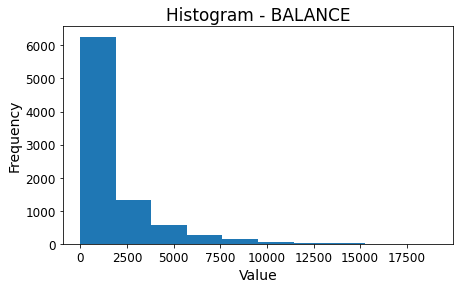

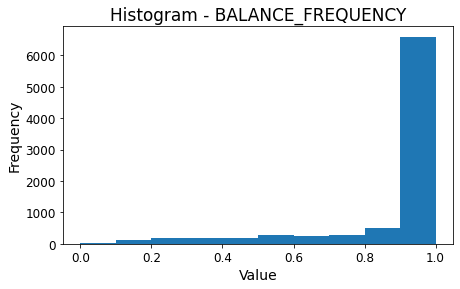

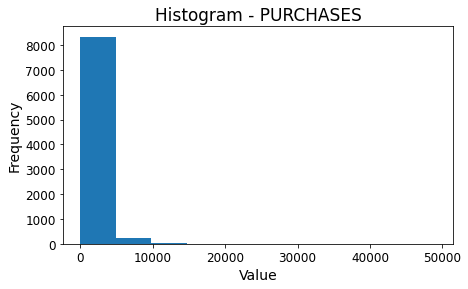

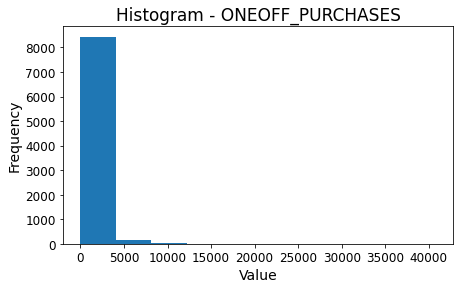

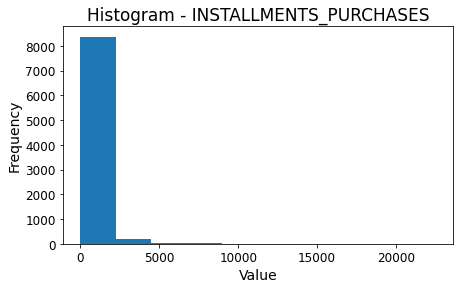

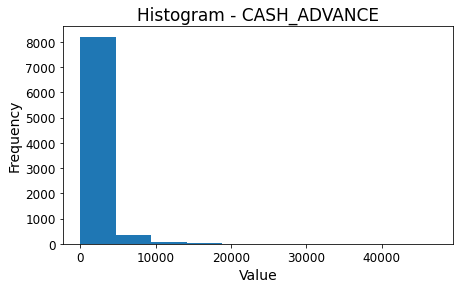

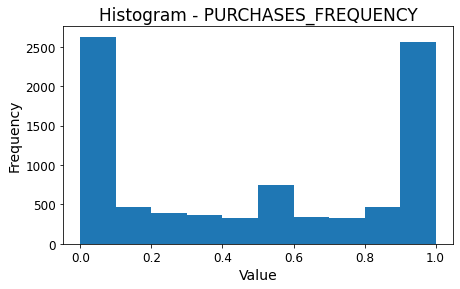

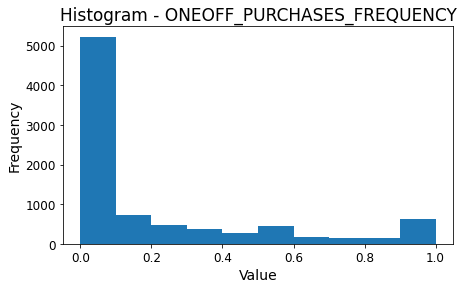

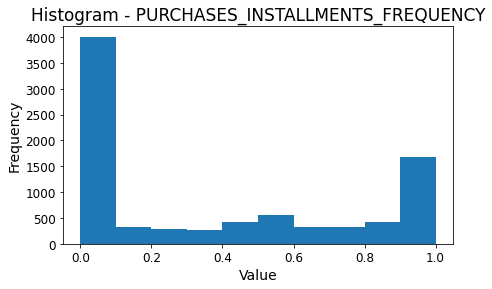

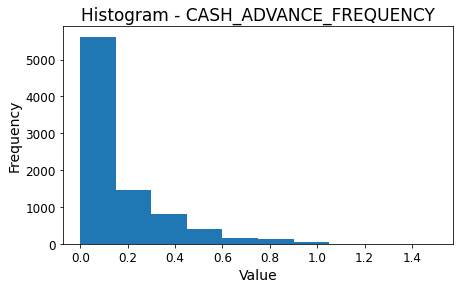

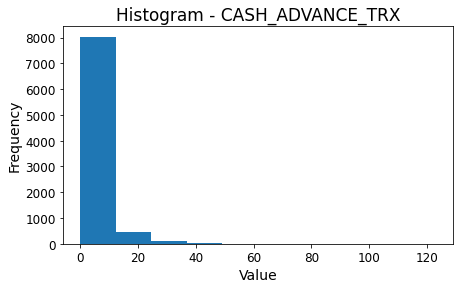

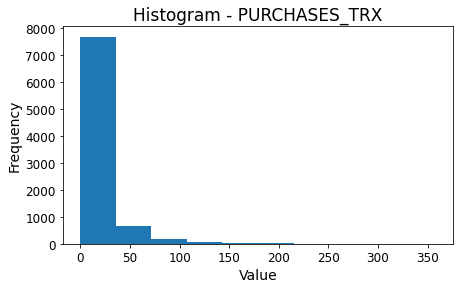

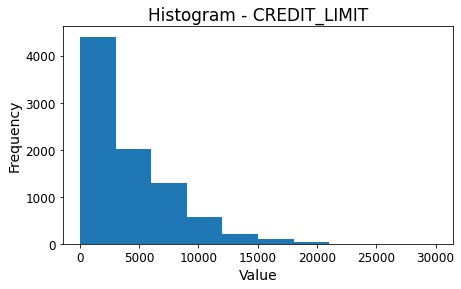

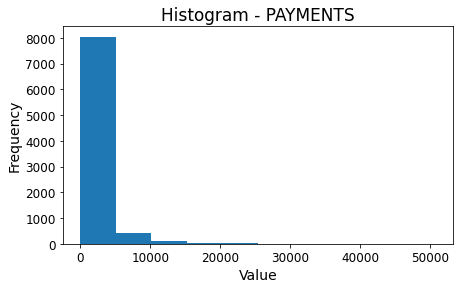

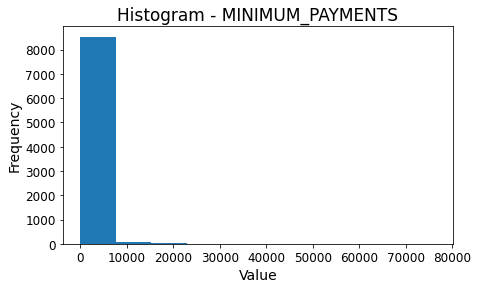

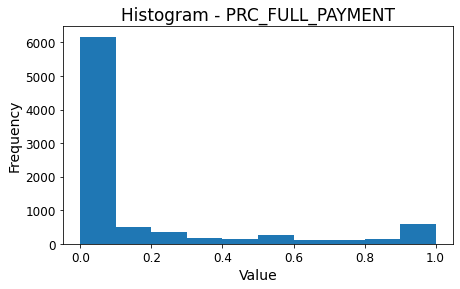

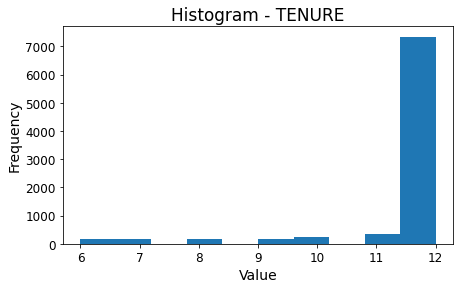

In [5]:
for feature in features:
    plot_hist_feature(df[feature], feature, nbins=None)

# b. Data exploration

In [6]:
def get_pearson_coeff(dataframe, feature1, feature2):
    '''
    Given 2 feature names return the Pearson’s correlation coefficient between them
    '''
    ### YOUR CODE HERE
    x = dataframe[feature1]
    y = dataframe[feature2]
    return stats.pearsonr(x, y)[0]

In [7]:
corrs = np.zeros((17, 17))

for i, feature1 in enumerate(features):
    for j, feature2 in enumerate(features):
        if i > j:
            continue
        corr = get_pearson_coeff(df, feature1, feature2)
        corrs[i, j] = corr
        corrs[j, i] = corr

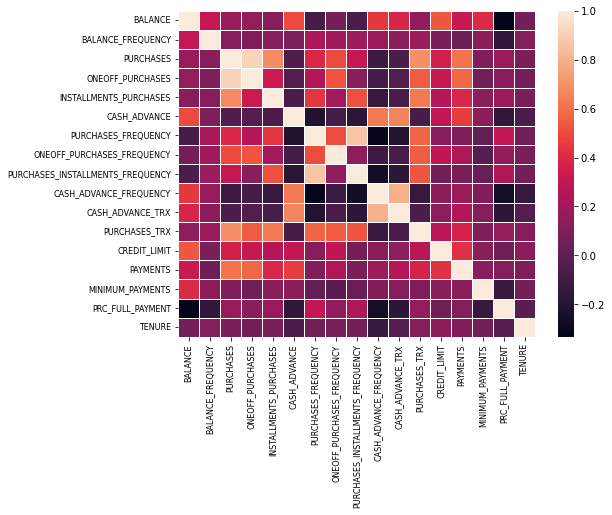

In [8]:
plt.figure(figsize=(8,6))
sns.heatmap(corrs, linewidths=.5)
plt.xticks(np.arange(17)+0.5, features, rotation=90, fontsize=8)
plt.yticks(np.arange(17)+0.5, features, rotation=0,fontsize=8)
plt.show()

# c. K-means clustering

In [9]:
list_features = features[0:15]
X = df[list_features].values

In [10]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [11]:
inertias = []

for k in range(1, 30):
    kmeans = KMeans(n_clusters=k, random_state=0, init='random')
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

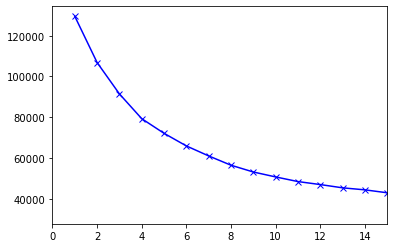

In [14]:
plt.plot(range(1, 30), inertias, 'bx-')
plt.xlim([0, 15])
plt.show()

In [15]:
from yellowbrick.cluster import KElbowVisualizer

In [18]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1, 30))

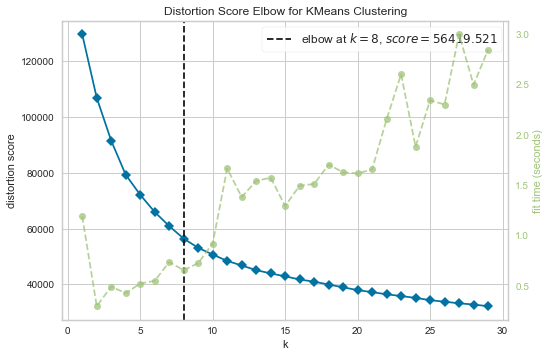

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [19]:
visualizer.fit(X)
visualizer.show()

In [20]:
optimal_k = 8
kmeans = KMeans(n_clusters=optimal_k, random_state=0, init='random')
kmeans.fit(X)

KMeans(init='random', random_state=0)

In [21]:
# number of users on each clusters
values, counts = np.unique(kmeans.labels_, return_counts=True)

for value, count in zip(values, counts):
    print(value, count)

0 2190
1 854
2 54
3 1211
4 381
5 2740
6 25
7 1181


In [22]:
# centroids
for i, centroid in enumerate(kmeans.cluster_centers_):
    print(i, centroid.round(2))

0 [-0.39  0.3  -0.07 -0.26  0.3  -0.36  0.95 -0.41  1.14 -0.46 -0.36  0.12
 -0.32 -0.26 -0.11]
1 [ 1.64  0.35 -0.23 -0.16 -0.24  2.02 -0.49 -0.22 -0.42  1.93  1.92 -0.28
  1.02  0.81  0.37]
2 [ 1.08  0.45 -0.13 -0.3   0.24 -0.04 -0.11 -0.57  0.13 -0.15 -0.05  0.02
 -0.11 -0.14  9.34]
3 [-0.12  0.36  0.46  0.59 -0.01 -0.32  0.9   1.78  0.11 -0.39 -0.31  0.52
  0.39  0.09 -0.14]
4 [ 0.92  0.45  2.38  1.79  2.34 -0.18  1.15  1.59  1.25 -0.31 -0.2   2.97
  1.26  1.37  0.32]
5 [-0.01  0.36 -0.38 -0.26 -0.42 -0.05 -0.93 -0.43 -0.81  0.2   0.01 -0.51
 -0.35 -0.27 -0.07]
6 [ 1.79  0.26 12.03 12.11  6.17  0.23  0.99  2.01  0.85 -0.4  -0.13  4.3
  3.24  8.72  0.99]
7 [-0.69 -2.2  -0.31 -0.23 -0.31 -0.3  -0.57 -0.43 -0.48 -0.49 -0.36 -0.43
 -0.21 -0.19 -0.29]


In [23]:
# scatter average distance to each cluster
for i in range(optimal_k):
    center = kmeans.cluster_centers_[i]
    dots = X[kmeans.labels_ == i]
    n_dots, _ = dots.shape
    centers = np.repeat(center.reshape(1, 15), n_dots, axis=0)
    
    distances2 = np.power(dots - centers, 2).sum(axis=1)
    distances = np.power(distances2, 0.5)
    scatter = distances.mean()
    print(i, scatter)

0 1.6398187266938173
1 3.6484811588310624
2 5.165941425286296
3 2.3264755259758103
4 4.381595525772177
5 1.6020390151378154
6 10.048458912950291
7 1.699891616323308
